# Test Visualization
git remote set-url origin https://github.com/username/repository.git


(Last updated: May 22, 2023)

You can also create content with Jupyter Notebooks.
This means that you can include code blocks and their outputs in your book.
In this notebook, we show some examples of loading and plotting data.
Check [this documentation](https://jupyterbook.org/en/stable/content/executable/index.html) about how to write executable content.

In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

You can put your data at the same directory as the notebook file and then use `pandas` to load the data.

In [2]:
# # create small_dataset_test
# cols_to_use = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(i) for i in range(2010, 2022)]
# df = pd.read_csv('WDIData.csv', sep=',', usecols=cols_to_use)
# df = df[df['Indicator Name'].isin(['GDP (constant 2015 US$)',
#                                    'Birth rate, crude (per 1,000 people)'])]
# df.to_csv('small_dataset_test.csv', index=False)
# df 

# import dataset
df = pd.read_csv('small_dataset_test.csv', sep=',')
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,3.767701e+01,3.723756e+01,3.677038e+01,3.628490e+01,3.579169e+01,3.529975e+01,3.482077e+01,3.435775e+01,3.391303e+01,3.349127e+01,3.309241e+01,NaN
1,Africa Eastern and Southern,AFE,GDP (constant 2015 US$),NY.GDP.MKTP.KD,7.918201e+11,8.209659e+11,8.285440e+11,8.633446e+11,8.977436e+11,9.242525e+11,9.447434e+11,9.689017e+11,9.929813e+11,1.013099e+12,9.838518e+11,1.026194e+12
2,Africa Western and Central,AFW,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,4.060151e+01,4.024159e+01,3.985258e+01,3.943507e+01,3.899388e+01,3.853572e+01,3.806948e+01,3.760418e+01,3.714846e+01,3.670854e+01,3.628772e+01,NaN
3,Africa Western and Central,AFW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,5.975663e+11,6.265383e+11,6.587611e+11,6.989731e+11,7.404038e+11,7.607345e+11,7.617070e+11,7.793610e+11,8.023692e+11,8.280654e+11,8.206375e+11,8.527638e+11
4,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2.751343e+01,2.748488e+01,2.738934e+01,2.721152e+01,2.694084e+01,2.657699e+01,2.613466e+01,2.564768e+01,2.514710e+01,2.465062e+01,2.417120e+01,NaN


In [3]:
# focus on these countries
df = df[df['Country Code'].isin(['NLD', 'USA', 'JPN'])]
df

# Melt columns
melt_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
df = df.melt(id_vars=melt_columns, var_name='Year', value_name='Value')

# Remove missing values
df = df.dropna()

# Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'])

df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Japan,JPN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2010,8.500000e+00
1,Japan,JPN,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2010,4.218908e+12
2,Netherlands,NLD,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2010,1.110000e+01
3,Netherlands,NLD,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2010,7.375657e+11
4,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2010,1.300000e+01
...,...,...,...,...,...,...
64,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2020,1.090000e+01
65,United States,USA,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2020,1.924706e+13
67,Japan,JPN,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2021,4.433848e+12
69,Netherlands,NLD,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2021,8.490392e+11


## Plot data

Testing plot

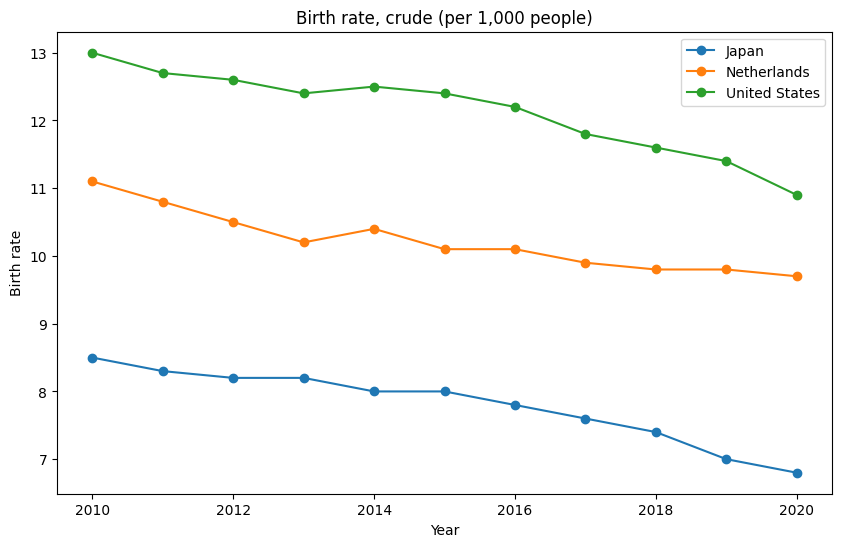

In [4]:
df_birth_rate = df[df["Indicator Name"] == "Birth rate, crude (per 1,000 people)"]

# Line plot for birth rates
plt.figure(figsize=(10, 6))
for country in df_birth_rate['Country Name'].unique():
    country_data = df_birth_rate[df_birth_rate['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], marker='o', label=country)
plt.title('Birth rate, crude (per 1,000 people)')
plt.ylabel('Birth rate')
plt.xlabel('Year')
plt.legend()
plt.show()

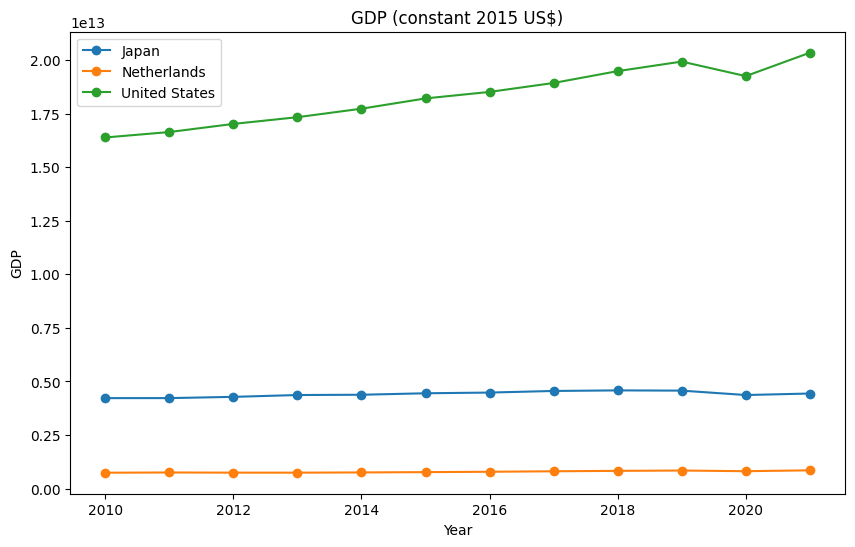

In [5]:
df_gdp = df[df["Indicator Name"] == "GDP (constant 2015 US$)"]

# Line plot for GDP
plt.figure(figsize=(10, 6))
for country in df_gdp['Country Name'].unique():
    country_data = df_gdp[df_gdp['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], marker='o', label=country)
plt.title('GDP (constant 2015 US$)')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.legend()
plt.show()